In [102]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Data Preparation

In [89]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [90]:
n_samples, n_features = X.shape
print(f'No of samples: {n_samples}')
print(f'No of features: {n_features}')

No of samples: 569
No of features: 30


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Convert to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [94]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### Model

In [95]:
# Linear model f = wx + b , sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
      x = self.linear(x)
      y_pred = torch.sigmoid(x)
      return y_pred

In [96]:
model = LogisticRegression(n_features)

### Loss and Optimizer

In [97]:
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Trainig Loop

In [98]:
epochs = []
losses = []
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        epochs.append(epoch)
        losses.append(loss.item())

epoch: 10, loss = 0.6113
epoch: 20, loss = 0.5084
epoch: 30, loss = 0.4419
epoch: 40, loss = 0.3951
epoch: 50, loss = 0.3601
epoch: 60, loss = 0.3330
epoch: 70, loss = 0.3111
epoch: 80, loss = 0.2931
epoch: 90, loss = 0.2780
epoch: 100, loss = 0.2650


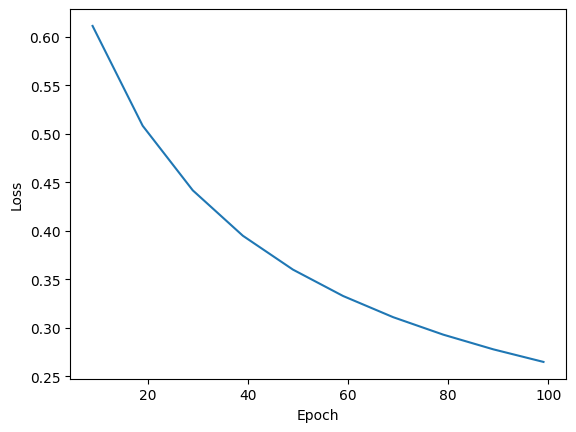

In [100]:
plt.plot(epochs,losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Evaluation

In [101]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9825


In [103]:
print(classification_report(y_test,y_predicted_cls))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

